<a href="https://colab.research.google.com/github/kmouts/PPS_MultiComms/blob/master/video_analytics_with_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ανάλυση βίντεο με τεχνικές Βαθιάς Μάθησης

## Εισαγωγή
Σε αυτό το εργαστήριο θα χρησιμοποιήσουμε τεχνικές Deep Learning για να αναγνωρίσουμε διαφορετικούς χαρακτήρες σε ένα βίντεο, και το χρόνο που παρουσιάζεται κάθε ένας. Θα δουλέψουμε με Python σε ένα απλό βίντεο κινούμενων σχεδίων! (Tom & Jerry).

Τα βήματα που θα ακολουθήσουμε είναι τα εξής:

1.   Διάβασμα βίντεο και εξαγωγή  σκηνών (frames)
2.   Πως χειριζόμαστε αρχεία βίντεο σε Python
3.   Υπολογισμός σκηνικού χρόνου - Μια απλή λύση
4.   Συμπεράσματα

### 1.   Διάβασμα βίντεο και εξαγωγή  σκηνών (frames)
Το βίντεο δεν είναι τίποτε παραπάνω από μια συλλογή εικόνων. Αυτές οι εικόνες ονομάζονται σκηνές (frames) και μπορούν να συνδιαστούν για να πάρουμε το αρχικό βίντεο. Ετσι, το πρόβλημα σε σχέση με δεδομένα βίντεο δεν είναι τόσο διαφορετικό απο την ταξινόμηση εικόνας ή την αναγνώριση αντικειμένων. Απλώς υπάρχει ένα επιπλέον βήμα του τα εξάγουμε σκηνές από το βίντεο.

Μιάς και το πρόβλημά μας είναι να υπολογίσουμε το χρόνο κάθε χαρακτήρα στο βίντεο, ας δούμε πιο αναλυτικά τα βήματα που θα ακολουθήσουμε:


*   Εισαγωγή και ανάγνωση του βίντεο, εξαγωγή σκηνών και αποθήκευση ως εικόνες.
*   Χαρακτηρισμός κάποιων εικόνων για εκπαίδευση του μοντέλου.
*   Δημιουργία μοντέλου με εκπαίδευση.
*   Προβλέψεις για τις υπόλοιπες εικόνες.
*   Υπολογισμός σκηνικού χρόνου.





### Χειρισμός αρχείων βίντεο με Python
Ξεκινάμε με την εισαγωγή απαραίτητων βιβλιοθηκών:

    Numpy
    Pandas
    Matplotlib
    Keras
    Skimage
    OpenCV


In [183]:
!apt install ffmpeg
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images



Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


### Βήμα – 1: Διάβασμα βίντεο, εξαγωγή σκηνών και αποθήκευση ως εικόνες

Ας κατεβάσουμε το βίντεο με την συνάρτηση `wget`.

In [184]:
#!pip install gdown
import gdown

url = 'https://github.com/kmouts/PPS_MultiComms/blob/master/Tom_jerry.mp4?raw=true'
output = 'Tom_jerry.mp4'
gdown.download(url, output, quiet=False)

Downloading...
From: https://github.com/kmouts/PPS_MultiComms/blob/master/Tom_jerry.mp4?raw=true
To: /content/Tom_jerry.mp4
100%|██████████| 25.6M/25.6M [00:00<00:00, 146MB/s] 


'Tom_jerry.mp4'

In [185]:
!ls -lah

total 26M
drwxr-xr-x 1 root root 4.0K Mar  5 19:53 .
drwxr-xr-x 1 root root 4.0K Mar  5 14:51 ..
drwxr-xr-x 4 root root 4.0K Mar  1 14:35 .config
drwxr-xr-x 1 root root 4.0K Mar  1 14:35 sample_data
-rw-r--r-- 1 root root 1.1M Mar  5 17:56 sample.mp4
drwxr-xr-x 2 root root  12K Mar  5 18:46 tom
-rw-r--r-- 1 root root  25M Mar  5 19:53 Tom_jerry.mp4


Θα φορτώσουμε το βίντεο με τη συνάρτηση VideoCapture() και θα το μετατρέψουμε σε σκηνές (εικόνες) που θα τις σώσουμε με την συνάρτηση imwrite().

In [186]:
import os
if not os.path.isdir( 'tom' ) :
    os.mkdir( 'tom' )  # make sure the directory exists

In [187]:
count = 0
videoFile = "Tom_jerry.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="/content/tom/frame%d.jpg" % count;count+=1
        if not cv2.imwrite(filename, frame):
          raise Exception("Could not write image")
        #cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [ ]:
!ls -la tom

Οι εικόνες τώρα δημιουργήθηκαν. Ας δούμε μια εικόνα (σκηνή). Θα τη διαβάσουμε με την συνάρτηση `imread()` 

Let us try to visualize an image (frame). We will first read the image using the imread() function of matplotlib, and then plot it using the imshow() function.

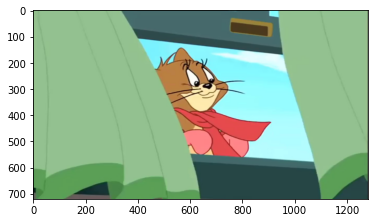

In [189]:
img = plt.imread('tom/frame0.jpg')   # reading image using its name
plt.imshow(img)